# Experiment plotting

This notebook contains the code for plotting results for the different experiments.
When run for the first time for a town, condensed summary files are being created which strongly speed up subsequent generations of plots from the same summaries. It is possible to create the plots only from the condensed summaries located in 'summaries/condensed_summaries'.
Note that this works for all experiments but the Rt plots, which still require the full summary file.


In [107]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [108]:
import os
import pandas as pd
import pickle
import itertools
from lib.measures import *
from lib.experiment import Experiment, Plot, Result, get_properties, load_summary_list, load_summary
from lib.data import collect_data_from_df
from lib.calibrationSettings import calibration_lockdown_dates, calibration_start_dates, calibration_mob_paths
from lib.calibrationFunctions import get_calibrated_params, downsample_cases
import lib.plot as lib_plot
from lib.plot import Plotter
import matplotlib.pyplot as plt
from lib.summary import load_condensed_summary

In [109]:
commithash = '9ee166f'

# SPECT tracing


Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.


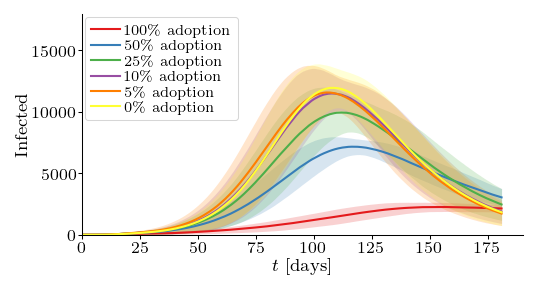

In [4]:
def plot_spect_tracing(*, country, area, ymax, ps_adoption, beta_dispersions, commithash=None):
    
    if commithash:
        commitstr = f'-{commithash}'
    else:
        commitstr = ''
    
    # Format: {`filename for plot` : `list of `Plot` objects`}
    plots = {
        f'spect-tracing-beta_dispersion={beta_dispersion}' : [
            Plot(label='{:3.0f}\% adoption'.format(100 * p_adoption),
                path=(f'spect-tracing-{country}-{area}{commitstr}/'
                      f'spect-tracing-{country}-{area}'
                      f'-p_adoption={p_adoption}'
                      f'-beta_dispersion={beta_dispersion}.pk'))
            for p_adoption in ps_adoption
        ]
        for beta_dispersion in beta_dispersions
    }
    
    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')

        # plots
        plotter = Plotter()

        plotter.compare_quantity(
            paths, 
            titles=labels,
            quantity='infected',     # Allowed values: ['infected', 'hosp', 'dead']
            mode='total',            # Allowed values: ['total', 'daily', 'cumulative']
            filename=plot_filename, 
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_DOUBLE_ARXIV_TALL, 
            figformat='neurips-double',
            legend_is_left=True)

ymax = {'CH' : {'TI': 100, 'BE': 40000, 'JU': 25000},
        'GER': {'TU': 17000, 'KL': 2000, 'RH': 3500}}
        
plot_spect_tracing(
    country='GER', 
    area='TU', 
    ymax=ymax, 
    ps_adoption=[1.0, 0.5, 0.25, 0.1, 0.05, 0.0],
    beta_dispersions=[1.0],
    commithash=commithash
)
        

No handles with labels found to put in legend.


Loaded previously extracted data.
Save: plots/daily-nbinom-rts-spect-tracing-p_adoption=1.0.pdf
Loaded previously extracted data.
Save: plots/prob-secondaryCases-spect-tracing-p_adoption=1.0.pdf


No handles with labels found to put in legend.


Loaded previously extracted data.
Save: plots/daily-nbinom-rts-spect-tracing-p_adoption=0.5.pdf
Loaded previously extracted data.
Save: plots/prob-secondaryCases-spect-tracing-p_adoption=0.5.pdf


No handles with labels found to put in legend.


Loaded previously extracted data.
Save: plots/daily-nbinom-rts-spect-tracing-p_adoption=0.25.pdf
Loaded previously extracted data.
Save: plots/prob-secondaryCases-spect-tracing-p_adoption=0.25.pdf


No handles with labels found to put in legend.


Loaded previously extracted data.
Save: plots/daily-nbinom-rts-spect-tracing-p_adoption=0.1.pdf
Loaded previously extracted data.
Save: plots/prob-secondaryCases-spect-tracing-p_adoption=0.1.pdf


No handles with labels found to put in legend.


Loaded previously extracted data.
Save: plots/daily-nbinom-rts-spect-tracing-p_adoption=0.05.pdf
Loaded previously extracted data.
Save: plots/prob-secondaryCases-spect-tracing-p_adoption=0.05.pdf


No handles with labels found to put in legend.


Loaded previously extracted data.
Save: plots/daily-nbinom-rts-spect-tracing-p_adoption=0.0.pdf
Loaded previously extracted data.
Save: plots/prob-secondaryCases-spect-tracing-p_adoption=0.0.pdf
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `tmp.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `tmp.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `tmp.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `tmp.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `tmp.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `tmp.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `tmp.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page wri

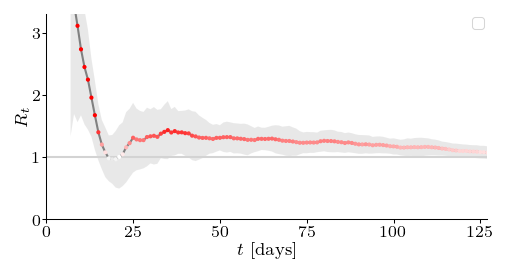

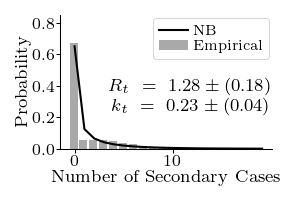

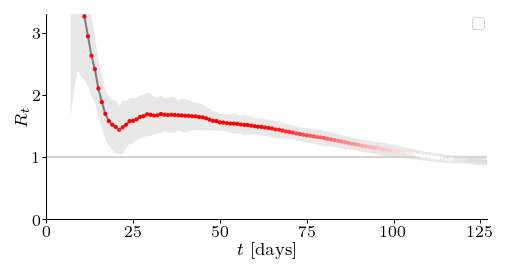

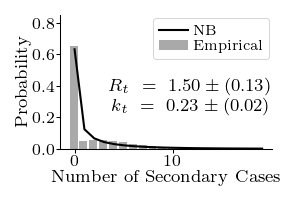

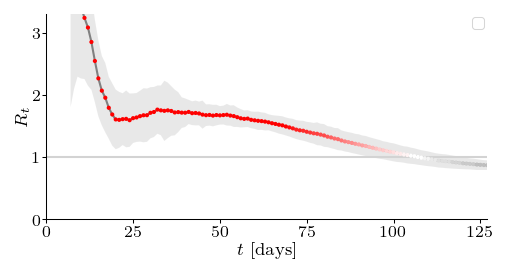

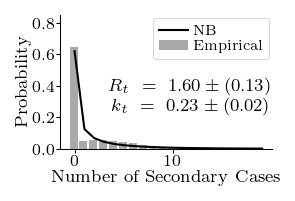

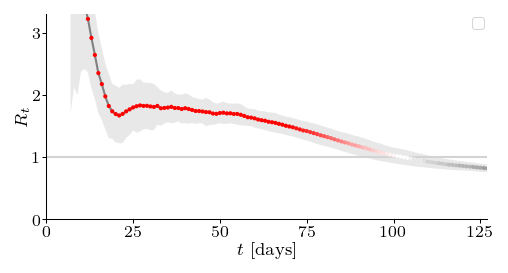

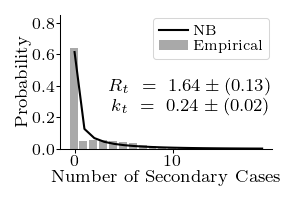

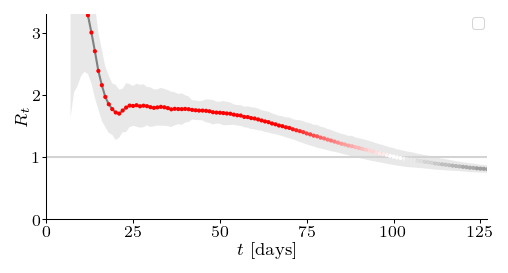

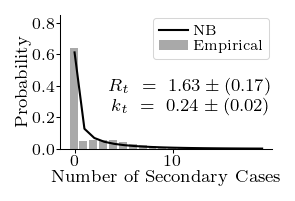

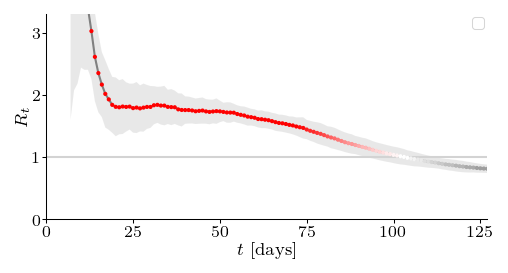

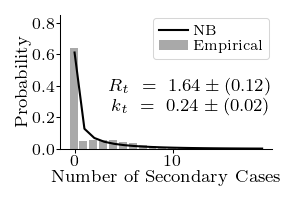

In [111]:
def plot_spect_tracing_rt(*, country, area, ps_adoption, beta_dispersion, plot_rt=True, plot_pmf=False, commithash='c005255'):
    if commithash:
        commitstr = f'-{commithash}'
    else:
        commitstr = ''
        
    # Format: {`filename for plot` : `list of `Plot` objects`}
    plots = {
        f'spect-tracing-p_adoption={p_adoption}' : [
            Plot(label='{:3.0f}\% adoption'.format(100 * p_adoption),
                path=(f'spect-tracing-{country}-{area}{commitstr}/'
                      f'spect-tracing-{country}-{area}'
                      f'-p_adoption={p_adoption}'
                      f'-beta_dispersion={beta_dispersion}.pk'))
        ]
        for p_adoption in ps_adoption
    }
    
    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')
        path = paths[0]
        
        # plot
        plotter = Plotter()
        plotter.plot_daily_nbinom_rts(
            path=path, 
            filename=plot_filename,
            cmap_range=(0.5, 1.5),
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_DOUBLE_ARXIV_TALL, 
            figformat='neurips-double',
            ymax=3.3,
            xlim=(0, 127),
            x_axis_dates=False,
            subplots_adjust={'bottom':0.2, 'top': 0.98, 'left': 0.12, 'right': 0.96},
        )
        
        nbinom_label_range = ['tracing']
        plotter.plot_nbinom_distributions(
            path=path,
            ymax=0.85,
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_DOUBLE_ARXIV_TALL, 
            figformat='neurips-double',
            label_range=nbinom_label_range,
            filename=plot_filename,
            acc=500,
        )

          
              
plot_spect_tracing_rt(
    country='GER', 
    area='TU', 
    ps_adoption=[1.0, 0.5, 0.25, 0.1, 0.05, 0.0],
    beta_dispersion=1.0,
    plot_rt=True, 
    plot_pmf=False,
    commithash=commithash
)

# Crop pdf margins
!bash crop_pdfs.sh plots/daily-nbinom-rts-*.pdf
!bash crop_pdfs.sh plots/prob-secondaryCases-*.pdf

# PanCast tracing


Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.


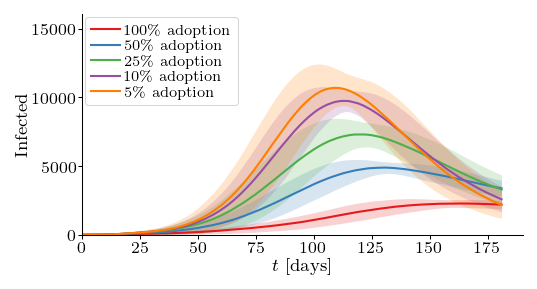

In [8]:
def plot_beacon_pancast_tracing(*, country, area, ymax, 
    ps_adoption, beacon_proportions, beacon_mode, p_recall, p_willing_to_share, beta_dispersion, commithash=None):
    
    if commithash:
        commitstr = f'-{commithash}'
    else:
        commitstr = ''
    
    
    normalization_baseline_path = (f'spect-tracing-{country}-{area}{commitstr}/'
                                  f'spect-tracing-{country}-{area}-p_adoption=0.0-beta_dispersion=1.0.pk')
    
    # Adoption lines given `beacon_proportion` 
    plots = {
        
        (f'pancast-tracing' 
          f'-beacon_proportion={beacon_proportion}'
        )
        : [
            Plot(label='{:3.0f}\% adoption'.format(100 * p_adoption),
                path=(f'pancast-tracing-{country}-{area}{commitstr}/'
                      f'pancast-tracing-{country}-{area}'
                      f'-p_adoption={p_adoption}'
                      f'-p_recall={p_recall}'
                      f'-beacon_proportion={beacon_proportion}'
                      f'-beacon_mode={beacon_mode}'
                      f'-beta_dispersion={beta_dispersion}'
                      '.pk'))
            for p_adoption in ps_adoption
        ]
        for beacon_proportion in beacon_proportions
    }
        
    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')

        # plots
        plotter = Plotter()

        plotter.compare_quantity(
            paths, 
            titles=labels,
            quantity='infected',     # Allowed values: ['infected', 'hosp', 'dead']
            mode='total',            # Allowed values: ['total', 'daily', 'cumulative']
            normalization_baseline_path = normalization_baseline_path,
            filename=plot_filename, 
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_DOUBLE_ARXIV_TALL, 
            figformat='neurips-double',
            legend_is_left=True)

ymax = {'CH' : {'TI': 100, 'BE': 40000, 'JU': 25000},
        'GER': {'TU': 17000, 'KL': 2000, 'RH': 3500}}
        
plot_beacon_pancast_tracing(
    country='GER', 
    area='TU', 
    ymax=ymax, 
    ps_adoption=[1.0, 0.5, 0.25, 0.1, 0.05],
    beacon_proportions=[1.0],#, 0.25, 0.1, 0.05, 0.02],
    beta_dispersion=1.0,
    beacon_mode='visit_freq',
    p_recall=0.1,
    p_willing_to_share=1.0,
    commithash=commithash
)
        

Loaded previously extracted data.
Save: plots/daily-nbinom-rts-pancast-tracing-beacon_proportion=0.25-p_adoption=1.0.pdf
Loaded previously extracted data.
Save: plots/prob-secondaryCases-pancast-tracing-beacon_proportion=0.25-p_adoption=1.0.pdf
Loaded previously extracted data.
Save: plots/daily-nbinom-rts-pancast-tracing-beacon_proportion=0.25-p_adoption=0.5.pdf
Loaded previously extracted data.
Save: plots/prob-secondaryCases-pancast-tracing-beacon_proportion=0.25-p_adoption=0.5.pdf
Loaded previously extracted data.
Save: plots/daily-nbinom-rts-pancast-tracing-beacon_proportion=0.25-p_adoption=0.25.pdf
Loaded previously extracted data.
Save: plots/prob-secondaryCases-pancast-tracing-beacon_proportion=0.25-p_adoption=0.25.pdf
Loaded previously extracted data.
Save: plots/daily-nbinom-rts-pancast-tracing-beacon_proportion=0.25-p_adoption=0.1.pdf
Loaded previously extracted data.
Save: plots/prob-secondaryCases-pancast-tracing-beacon_proportion=0.25-p_adoption=0.1.pdf
PDFCROP 1.38, 2012

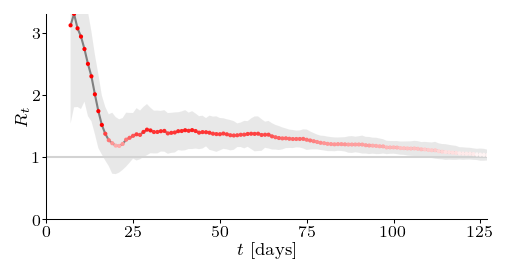

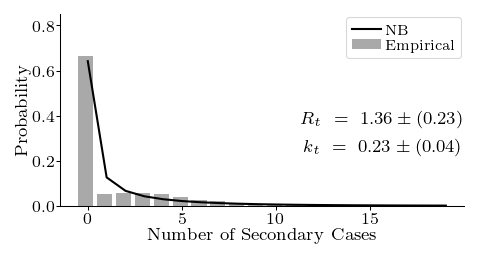

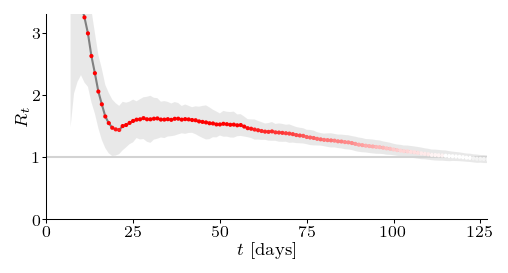

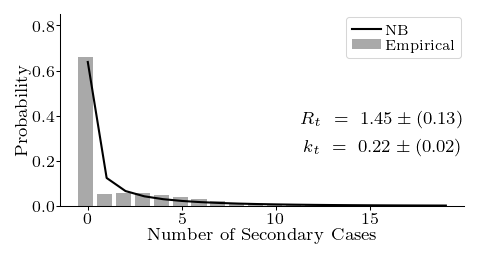

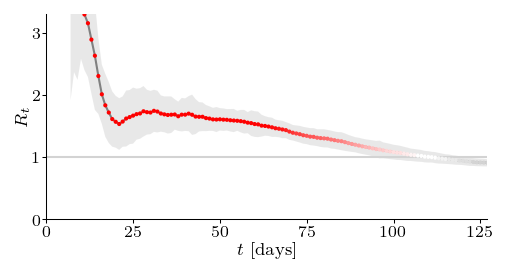

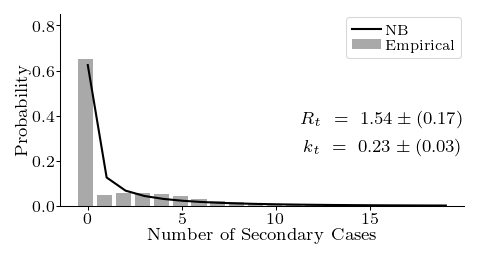

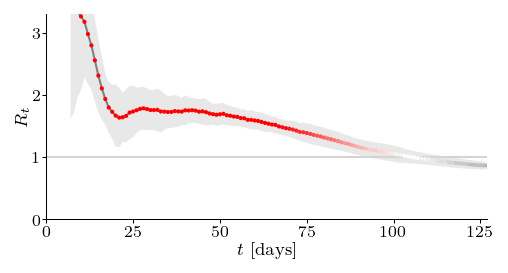

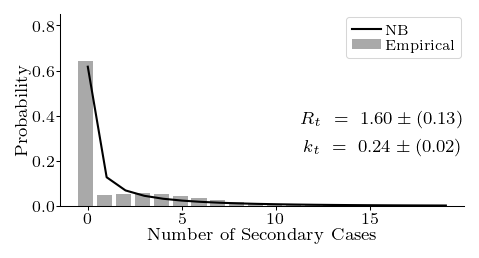

In [10]:
def plot_pancast_tracing_rt(*, country, area, ps_adoption, beta_dispersion, beacon_proportions,
                            beacon_mode, p_recall, plot_rt=True, plot_pmf=False, commithash=None):
    
    if commithash:
        commitstr = f'-{commithash}'
    else:
        commitstr = ''
    
    # Format: {`filename for plot` : `list of `Plot` objects`}
    plots = {
    
        (f'pancast-tracing' 
          f'-beacon_proportion={beacon_proportion}-p_adoption={p_adoption}'
        )
        : [
            Plot(label='{:3.0f}\% adoption'.format(100 * p_adoption),
                path=(f'pancast-tracing-{country}-{area}{commitstr}/'
                      f'pancast-tracing-{country}-{area}'
                      f'-p_adoption={p_adoption}'
                      f'-p_recall={p_recall}'
                      f'-beacon_proportion={beacon_proportion}'
                      f'-beacon_mode={beacon_mode}'
                      f'-beta_dispersion={beta_dispersion}'
                      '.pk'))
        ]
        for beacon_proportion, p_adoption in itertools.product(beacon_proportions, ps_adoption)
    }
    
    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')
        path = paths[0]
        
        # plot
        plotter = Plotter()
        plotter.plot_daily_nbinom_rts(
            path=path, 
            filename=plot_filename,
            cmap_range=(0.5, 1.5),
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_DOUBLE_ARXIV_TALL, 
            figformat='neurips-double',
            ymax=3.3,
            xlim=(0, 127),
            x_axis_dates=False,
            subplots_adjust={'bottom':0.2, 'top': 0.98, 'left': 0.12, 'right': 0.96},
        )
        
        nbinom_label_range = ['tracing']
        plotter.plot_nbinom_distributions(
            path=path,
            ymax=0.85,
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_DOUBLE_ARXIV_TALL, 
            figformat='neurips-double',
            label_range=nbinom_label_range,
            filename=plot_filename,
        )

          
              
plot_pancast_tracing_rt(
    country='GER', 
    area='TU', 
    ps_adoption=[1.0, 0.5, 0.25, 0.1],
    beta_dispersion=1.0,
    beacon_proportions=[0.25],
    beacon_mode='visit_freq',
    p_recall=0.1,
    plot_rt=True, 
    plot_pmf=False,
    commithash=commithash
)

# Crop pdf margins
!bash crop_pdfs.sh plots/daily-nbinom-rts-*.pdf
!bash crop_pdfs.sh plots/prob-secondaryCases-*.pdf

# PanCast tracing at sparse locations


Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previou

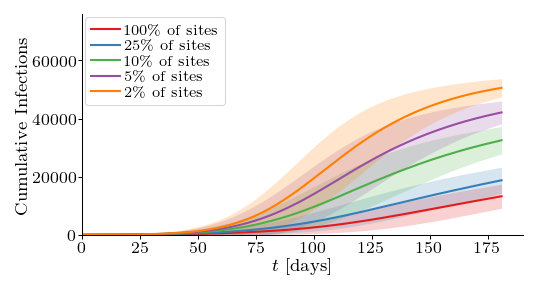

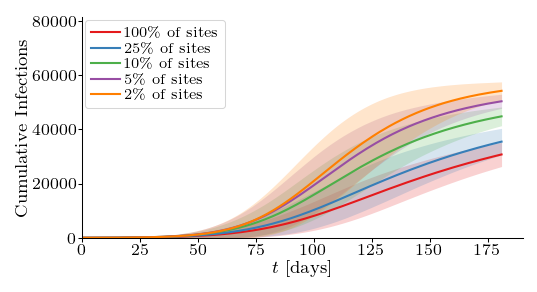

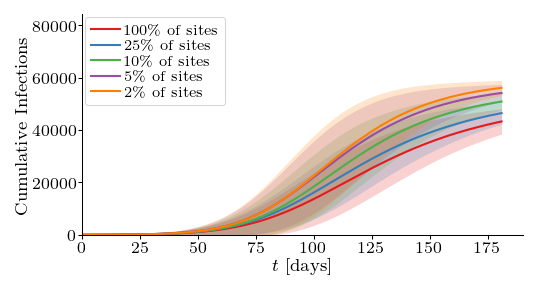

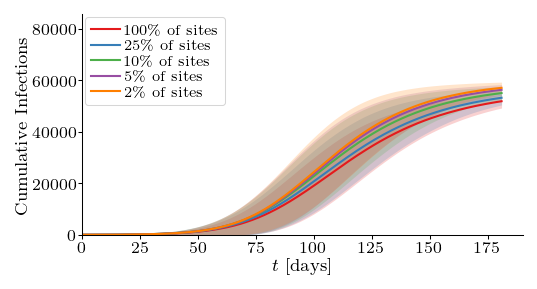

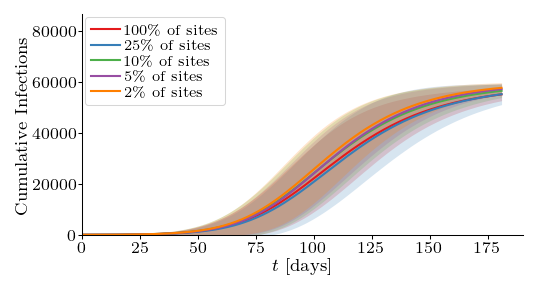

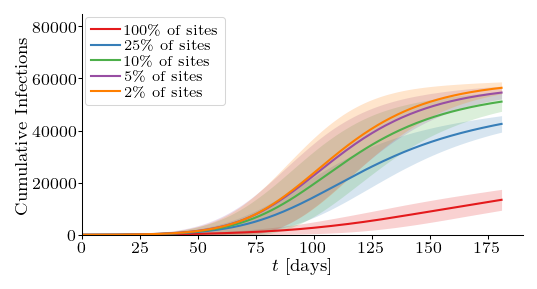

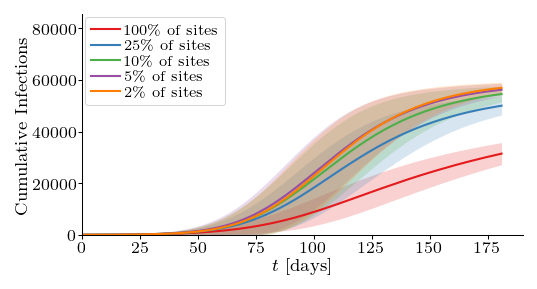

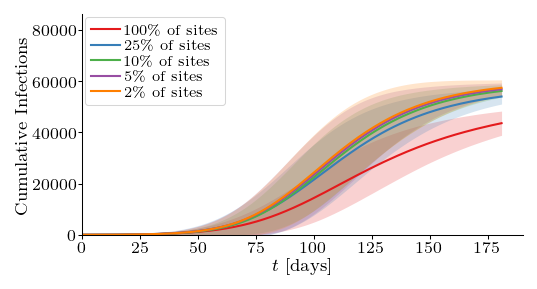

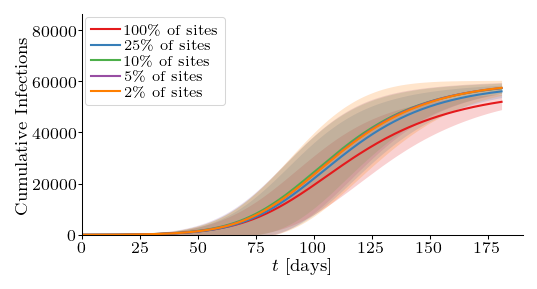

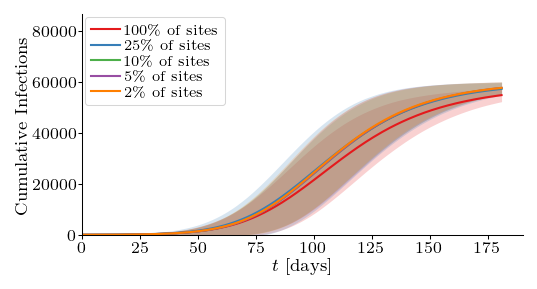

In [11]:
def plot_beacon_pancast_tracing_sparse(*, country, area, ymax, 
    ps_adoption, beacon_proportions, beacon_mode, p_recall, beta_dispersion, commithash=None):
    
    if commithash:
        commitstr = f'-{commithash}'
    else:
        commitstr = ''
    
    # beacon_proportion lines given adoption 
    plots = {
        
        (f'pancast-tracing' 
          f'-p_adoption={p_adoption}'
          f'-beacon_mode={beacon_mode}'
        )
        : [
            Plot(label='{:3.0f}\% of sites'.format(100 * beacon_proportion),
                path=(f'pancast-tracing-{country}-{area}{commitstr}/'
                      f'pancast-tracing-{country}-{area}'
                      f'-p_adoption={p_adoption}'
                      f'-p_recall={p_recall}'
                      f'-beacon_proportion={beacon_proportion}'
                      f'-beacon_mode={beacon_mode}'
                      f'-beta_dispersion={beta_dispersion}'
                      '.pk'))
            for beacon_proportion in beacon_proportions
        ]
        for p_adoption in ps_adoption
    }
        
    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')

        # plots
        plotter = Plotter()
        
        plotter.compare_quantity(
            paths, 
            titles=labels,
            quantity='infected',     # Allowed values: ['infected', 'hosp', 'dead']
            mode='cumulative',            # Allowed values: ['total', 'daily', 'cumulative']
            filename=plot_filename, 
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_DOUBLE_ARXIV_TALL, 
            figformat='neurips-double',
            legend_is_left=True)

ymax = {'CH' : {'TI': 100, 'BE': 40000, 'JU': 25000},
        'GER': {'TU': 17000, 'KL': 2000, 'RH': 3500}}
        
plot_beacon_pancast_tracing_sparse(
    country='GER', 
    area='TU', 
    ymax=ymax, 
    ps_adoption=[1.0, 0.5, 0.25, 0.1, 0.05],
    beacon_proportions=[1.0, 0.25, 0.1, 0.05, 0.02],
    beacon_mode='visit_freq',
    p_recall=0.1,
    beta_dispersion=1.0,
    commithash=commithash
)

plot_beacon_pancast_tracing_sparse(
    country='GER', 
    area='TU', 
    ymax=ymax, 
    ps_adoption=[1.0, 0.5, 0.25, 0.1, 0.05],
    beacon_proportions=[1.0, 0.25, 0.1, 0.05, 0.02],
    beacon_mode='random',
    p_recall=0.1,
    beta_dispersion=1.0,
    commithash=commithash
)
        

Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.


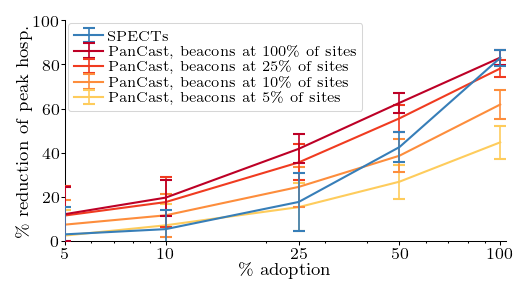

In [41]:
def plot_adoption_vs_relative_reduction(*, country, area, mode, ps_adoption, beta_dispersion=1.0, beacon_proportions=1.0,
                            beacon_mode='visit_freq', p_recall=0.1, plot_rt=True, plot_pmf=False, commithash=None):
    
    if commithash:
        commitstr = f'-{commithash}'
    else:
        commitstr = ''

        
    plot_filename = f'reduction-{mode}-{country}-{area}-beacon_mode={beacon_mode}'

    paths = [ [f'spect-tracing-{country}-{area}{commitstr}/'
                      f'spect-tracing-{country}-{area}'
                      f'-p_adoption={p_adoption}'
                      f'-beta_dispersion={beta_dispersion}'
                      '.pk' for p_adoption in ps_adoption]
            ]
    titles = ['SPECTs']
    
    for beacon_proportion in beacon_proportions:
        paths.append([f'pancast-tracing-{country}-{area}{commitstr}/'
                      f'pancast-tracing-{country}-{area}'
                      f'-p_adoption={p_adoption}'
                      f'-p_recall={p_recall}'
                      f'-beacon_proportion={beacon_proportion}'
                      f'-beacon_mode={beacon_mode}'
                      f'-beta_dispersion={beta_dispersion}'
                      '.pk' for p_adoption in ps_adoption])
        titles.append(f'PanCast, beacons at {int(beacon_proportion*100)}\% of sites')


    baseline_path = (f'spect-tracing-{country}-{area}{commitstr}/'
                      f'spect-tracing-{country}-{area}'
                      f'-p_adoption=0.0'
                      f'-beta_dispersion={beta_dispersion}.pk')


    plotter = Plotter()
    plotter.compare_peak_reduction(path_list=paths, 
                                   baseline_path=baseline_path, 
                                   ps_adoption=ps_adoption,
                                   titles=titles,
                                   mode=mode,   # Allowed values ['cumu_infected', 'hosp', 'dead']
                                   filename=plot_filename,
                                   figsize=lib_plot.FIG_SIZE_FULL_PAGE_DOUBLE_ARXIV_TALL, 
                                   figformat='neurips-double',
                                   legend_is_left=True)

              
plot_adoption_vs_relative_reduction(
    country='GER', 
    area='TU', 
    mode='hosp',   # Allowed values ['cumu_infected', 'hosp', 'dead']
    ps_adoption=[1.0, 0.5, 0.25, 0.1, 0.05],
    beacon_proportions=[1.0, 0.25, 0.1, 0.05],#, 0.02],
    beacon_mode='visit_freq',
    plot_rt=True, 
    plot_pmf=False,
    commithash=commithash
)

## ROC

In [ ]:
def plot_roc(*, country, area, p_adoption, beta_dispersions, commithash=None):
    if commithash:
        commitstr = f'-{commithash}'
    else:
        commitstr = ''
    
    # Format: {`filename for plot` : `list of `Plot` objects`}
    plots = {
         f'beacon-environment-{country}-{area}-beta_dispersion={beta_dispersion}' : [
            Plot(label='tracing-stats', 
                path=(f'beacon-environment-{country}-{area}{commitstr}/'
                      f'beacon-environment-{country}-{area}'
                      f'-beacon=all'
                      f'-p_adoption={p_adoption}'
                      f'-beta_dispersion={beta_dispersion}'
                      '.pk')),
        ] for beta_dispersion in beta_dispersions
    }
    
    for plot_filename, plots in plots.items():
        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')
    
        # plots
        plotter = Plotter()

        plotter.plot_roc_curve(
            titles=labels,
            summaries=None,
            paths=paths,
            filename=plot_filename, 
            action='isolate',
            figsize=(2.0, 1.8), 
#             figsize=(1.8, 1.6), 
            figformat='neurips-double',
            use_medical_labels=True)

        
plot_roc(
    country='GER', 
    area='TU', 
    p_adoption=1.0,
    beta_dispersions=[20.0, 10.0, 5.0, 2.0],
    commithash=commithash
)
    


In [ ]:
# Crop pdf margins
# !bash crop_pdfs.sh plots/beacon-environment-*.pdf


# Heat maps

In [ ]:
def plot_relative_quantity_heatmap(*, country, area, mode,
    ps_adoption, beta_dispersion, beacon_proportions, 
    beacon_mode, p_recall, interpolate, cmap):
    
    filename = (
        f'relative-{mode}-heatmap-beacon_mode={beacon_mode}'
    )
    
    baseline_path = (
        f'spect-tracing-{country}-{area}-{commithash}/'
        f'spect-tracing-{country}-{area}'
        f'-p_adoption=0.0'
        f'-beta_dispersion={beta_dispersion}.pk')
    
    # pair of list of tuples (x, y, path)
    paths = (
        # spect
        [(None, p_adoption, 
         (f'spect-tracing-{country}-{area}-{commithash}/'
          f'spect-tracing-{country}-{area}'
          f'-p_adoption={p_adoption}'
          f'-beta_dispersion={beta_dispersion}'
          '.pk'))
        for p_adoption in ps_adoption],
        
        # pancast
        [(beacon_proportion, p_adoption, 
         (f'pancast-tracing-{country}-{area}-{commithash}/'
          f'pancast-tracing-{country}-{area}'
          f'-p_adoption={p_adoption}'
          f'-p_recall={p_recall}'
          f'-beacon_proportion={beacon_proportion}'
          f'-beacon_mode={beacon_mode}'
          f'-beta_dispersion={beta_dispersion}'
          '.pk'))
        for p_adoption in ps_adoption
        for beacon_proportion in beacon_proportions]
    )

    # plots
    plotter = Plotter()
    plotter.relative_quantity_heatmap(
        xlabel=r'\% sites with beacon',
        ylabel=r'\% adoption',
        path_labels=['SPECT', 'PanCast'],
        paths=paths, 
        mode=mode,
        baseline_path=baseline_path,
        filename=filename, 
#         figsize=lib_plot.FIG_SIZE_FULL_PAGE_DOUBLE_ARXIV_TALL, 
        figsize=(2.8, 2.0), 
        figformat='neurips-double',
        interpolate=interpolate,
        width_ratio=6,
        cmap=cmap,
    )

    
for mode in ["cumu_infected", "hosp"]:

    plot_relative_quantity_heatmap(
        mode=mode,
        country='GER', 
        area='TU', 
        ps_adoption=[0.1, 0.25, 0.5, 1.0],
        beta_dispersion=1.0,
        beacon_proportions=[1.0, 0.25, 0.1, 0.05, 0.02],
        beacon_mode='visit_freq',
        p_recall=0.1,
        interpolate='linear',
        cmap=plt.cm.RdYlGn,
    )

        

In [ ]:
def plot_relative_quantity_heatmap_beacon_mode(*, country, area, mode,
    ps_adoption, beta_dispersion, beacon_proportions, 
    p_recall, interpolate, cmap):
    
    filename = (
        f'relative-{mode}-heatmap-pancast'
    )
    
    baseline_path = (
        f'spect-tracing-{country}-{area}-{commithash}/'
        f'spect-tracing-{country}-{area}'
        f'-p_adoption=0.0'
        f'-beta_dispersion={beta_dispersion}.pk')
    
    # pair of list of tuples (x, y, path)
    paths = (
        # spect
        [(beacon_proportion, p_adoption, 
         (f'pancast-tracing-{country}-{area}-{commithash}/'
          f'pancast-tracing-{country}-{area}'
          f'-p_adoption={p_adoption}'
          f'-p_recall={p_recall}'
          f'-beacon_proportion={beacon_proportion}'
          f'-beacon_mode=random'
          f'-beta_dispersion={beta_dispersion}'
          '.pk'))
        for p_adoption in ps_adoption
        for beacon_proportion in beacon_proportions],
        
        # pancast
        [(beacon_proportion, p_adoption, 
         (f'pancast-tracing-{country}-{area}-{commithash}/'
          f'pancast-tracing-{country}-{area}'
          f'-p_adoption={p_adoption}'
          f'-p_recall={p_recall}'
          f'-beacon_proportion={beacon_proportion}'
          f'-beacon_mode=visit_freq'
          f'-beta_dispersion={beta_dispersion}'
          '.pk'))
        for p_adoption in ps_adoption
        for beacon_proportion in beacon_proportions]
    )

    # plots
    plotter = Plotter()
    plotter.relative_quantity_heatmap(
        xlabel=r'\% sites with beacon',
        ylabel=r'\% adoption',
        path_labels=['placed randomly', 'by integr. visit time'],
        paths=paths, 
        mode=mode,
        baseline_path=baseline_path,
        filename=filename, 
#         figsize=lib_plot.FIG_SIZE_FULL_PAGE_DOUBLE_ARXIV_TALL, 
        figsize=(4.0, 2.0), 
        figformat='neurips-double',
        interpolate=interpolate,
        width_ratio=1,
        cmap=cmap,
    )

    
for mode in ["cumu_infected", "hosp"]:
    plot_relative_quantity_heatmap_beacon_mode(
        mode=mode,
        country='GER', 
        area='TU', 
        ps_adoption=[0.1, 0.25, 0.5, 1.0],
        beta_dispersion=1.0,
        beacon_proportions=[1.0, 0.25, 0.1, 0.05, 0.02],
        p_recall=0.1,
        interpolate='linear',
        cmap=plt.cm.RdYlGn,
    )
        

In [ ]:
!bash crop_pdfs.sh plots/relative-*.pdf
